In [16]:
from langgraph.graph import StateGraph
from typing import TypedDict, Dict

# Define the state that holds input and output file paths
class ProcurementState(TypedDict):
    input_files: Dict[str, str]  # Tracks {step_name: file_path}
    output_file: str  # The last generated file


In [17]:
import os

class ProposalProcessor:
    def process(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)
        
        proposals_text = "Supplier A: $1000 per unit\nSupplier B: $950 per unit"
        output_path = "docs/proposals.md"
        
        with open(output_path, "w") as f:
            f.write("# Supplier Proposals\n\n" + proposals_text)
        
        state["input_files"]["proposals"] = output_path
        state["output_file"] = output_path
        return state


In [18]:
class RFPAnalysis:
    def analyze(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)

        with open(state["input_files"]["proposals"], "r") as f:
            proposals_text = f.read()

        analysis = "Supplier A meets all requirements. Supplier B lacks warranty details."
        output_path = "docs/rfp_analysis.md"

        with open(output_path, "w") as f:
            f.write("# RFP Analysis\n\n" + analysis)

        state["input_files"]["rfp_analysis"] = output_path
        state["output_file"] = output_path
        return state


In [19]:
class PricingRiskAnalysis:
    def analyze_pricing(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)

        with open(state["input_files"]["rfp_analysis"], "r") as f:
            rfp_analysis = f.read()

        risk_evaluation = "Supplier A: Medium Risk\nSupplier B: Low Risk"
        output_path = "docs/pricing_risk.md"

        with open(output_path, "w") as f:
            f.write("# Pricing Risk Analysis\n\n" + risk_evaluation)

        state["input_files"]["pricing_risk"] = output_path
        state["output_file"] = output_path
        return state


In [20]:
class NegotiationCharter:
    def generate_charter(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)

        with open(state["input_files"]["pricing_risk"], "r") as f:
            risk_analysis = f.read()

        negotiation_plan = "Negotiate with Supplier B to extend warranty coverage."
        output_path = "docs/negotiation_plan.md"

        with open(output_path, "w") as f:
            f.write("# Negotiation Plan\n\n" + negotiation_plan)

        state["input_files"]["negotiation_plan"] = output_path
        state["output_file"] = output_path
        return state


In [21]:
class ContractGenerator:
    def generate_contract(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)

        with open(state["input_files"]["rfp_analysis"], "r") as f:
            rfp = f.read()
        with open(state["input_files"]["pricing_risk"], "r") as f:
            risk = f.read()
        with open(state["input_files"]["negotiation_plan"], "r") as f:
            negotiation = f.read()

        contract_text = f"{rfp}\n\n{risk}\n\n{negotiation}\n\nAgreement Signed!"
        output_path = "docs/draft_contract.md"

        with open(output_path, "w") as f:
            f.write("# Draft Contract\n\n" + contract_text)

        state["input_files"]["contract"] = output_path
        state["output_file"] = output_path
        return state


In [22]:
class LegalReview:
    def review(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)

        with open(state["input_files"]["contract"], "r") as f:
            contract_text = f.read()

        legal_feedback = "The contract requires a clause for penalty on late delivery."
        output_path = "docs/legal_review.md"

        with open(output_path, "w") as f:
            f.write("# Legal Review\n\n" + legal_feedback)

        state["input_files"]["legal_review"] = output_path
        state["output_file"] = output_path
        return state


In [23]:
class ContractRevision:
    def revise(self, state: ProcurementState) -> ProcurementState:
        os.makedirs("docs", exist_ok=True)

        with open(state["input_files"]["legal_review"], "r") as f:
            review_text = f.read()

        revised_contract = "Supplier B agrees to include late delivery penalty."
        output_path = "docs/final_contract.md"

        with open(output_path, "w") as f:
            f.write("# Final Contract\n\n" + revised_contract)

        state["input_files"]["final_contract"] = output_path
        state["output_file"] = output_path
        return state


In [25]:
# Create the graph
graph_builder = StateGraph(ProcurementState)

# Add nodes
graph_builder.add_node("proposal_processor", ProposalProcessor().process)
graph_builder.add_node("rfp_analysis", RFPAnalysis().analyze)
graph_builder.add_node("pricing_risk", PricingRiskAnalysis().analyze_pricing)
graph_builder.add_node("negotiation_charter", NegotiationCharter().generate_charter)
graph_builder.add_node("contract_generator", ContractGenerator().generate_contract)
graph_builder.add_node("legal_review", LegalReview().review)
graph_builder.add_node("contract_reviser", ContractRevision().revise)

# Define edges (dependencies)
graph_builder.add_edge("proposal_processor", "rfp_analysis")
graph_builder.add_edge("rfp_analysis", "pricing_risk")
graph_builder.add_edge("pricing_risk", "negotiation_charter")
graph_builder.add_edge("rfp_analysis", "contract_generator")
graph_builder.add_edge("pricing_risk", "contract_generator")
graph_builder.add_edge("negotiation_charter", "contract_generator")
graph_builder.add_edge("contract_generator", "legal_review")
graph_builder.add_edge("legal_review", "contract_reviser")

# Set entry and exit points
graph_builder.set_entry_point("proposal_processor")
graph_builder.set_finish_point("contract_reviser")

# Compile the graph
graph = graph_builder.compile()

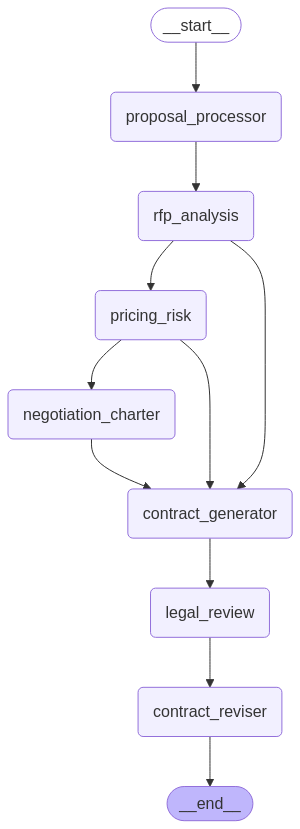

In [26]:
graph

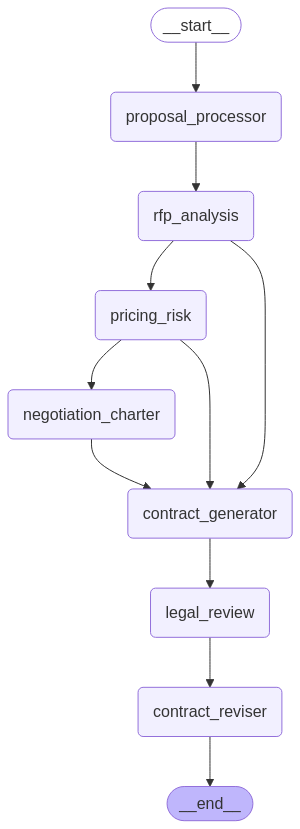

In [27]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass